<h1>Data Wrangling: Natural Language Processing<h1>
<h3>  Objective:</h3> <p>Here we will be generating some tokens on the content for every review. For NLP processe's we'll be using spacy and for Sentiment Analysis some Transformers</p>
<bh>



In [1]:
import numpy as np
import types
import pandas as pd
import nltk
from dateutil import parser
nltk.download('gutenberg')
nltk.download('genesis')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /home/spark/shared/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


## Data Load

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_03c3f449e3a74b8da664e49bfbd86b7e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XrKG-mLlaOOc0yOuhimgI7ltLGZu6MlvR-HNPdLjKNRt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_03c3f449e3a74b8da664e49bfbd86b7e.get_object(Bucket='personal-donotdelete-pr-em2zsfdcmhl7q5', Key='AmazonReviewsData.tsv')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1

In [3]:
from io import StringIO
from io import BytesIO
a=streaming_body_1.read()
df = pd.read_csv(BytesIO(a),sep='|', header=[0])
df.head(5)

,Review Author,Review Content,Stars
0,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0
1,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0
2,Carmen Heger,Ich bin total verliebt in diese Halsbander. Mi...,0.0
3,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0
4,Carmen Heger,Ich bin total verliebt in diese Halsbander. Mi...,0.0


## NLP Exploration

In [4]:
# Lets start with an overview
df['Review Content'].head(10)

0    Tolles Halsband super gut verarbeitet und die ...
1    Tolles Halsband super gut verarbeitet und die ...
2    Ich bin total verliebt in diese Halsbander. Mi...
3    Tolles Halsband super gut verarbeitet und die ...
4    Ich bin total verliebt in diese Halsbander. Mi...
5    Sehr susses Halsband, werde oft darauf angespr...
6    Tolles Halsband super gut verarbeitet und die ...
7    Ich bin total verliebt in diese Halsbander. Mi...
8    Sehr susses Halsband, werde oft darauf angespr...
9                          entspricht der Beschreibung
Name: Review Content, dtype: object

In [5]:

df['Review Content_nword'] = df['Review Content'].apply(lambda x: len(str(x).split(" ")))
df[["Review Content","Review Content_nword"]].sort_values(by = "Review Content_nword",ascending = True).head(5)


,Review Content,Review Content_nword
5719,NaN,1
2851,NaN,1
2863,NaN,1
5689,NaN,1
5698,NaN,1


In [6]:

df[["Review Content","Review Content_nword"]].sort_values(by = "Review Content_nword",ascending = False).head(10)


,Review Content,Review Content_nword
3808,Having a small dog (Yorkshire Terrier) doesnt ...,1033
1428,Having a small dog (Yorkshire Terrier) doesnt ...,1033
436,Having a small dog (Yorkshire Terrier) doesnt ...,1033
4059,We've had this collar for over three months no...,625
1677,We've had this collar for over three months no...,625
684,We've had this collar for over three months no...,625
685,We've had this collar for over three months no...,625
1686,We've had this collar for over three months no...,625
687,We've had this collar for over three months no...,625
690,We've had this collar for over three months no...,625


In [7]:
def splitTextToTriplet(string):
    words = str(string).split()
    grouped_words = [' '.join(words[i: i + 512]) for i in range(0, len(words), 512)]
    return grouped_words
cont=[]
for index, row in df.iterrows():
    if(int(row['Review Content_nword'])>512):
        value =row['Review Content']
        value= splitTextToTriplet(value[0])
        cont.append(value)
    else:
        cont.append(row['Review Content'])
df['Review Content']=cont

In [8]:

df["Review Content_nchars"] = df["Review Content"].str.len()

In [9]:

df[["Review Content","Review Content_nchars"]].sort_values(by = "Review Content_nchars",ascending = False).head()

,Review Content,Review Content_nchars
4058,While I never thought that I'd be buying a sho...,2434.0
1678,While I never thought that I'd be buying a sho...,2434.0
1683,While I never thought that I'd be buying a sho...,2434.0
1687,While I never thought that I'd be buying a sho...,2434.0
686,While I never thought that I'd be buying a sho...,2434.0


In [10]:

df[["Review Content","Review Content_nchars"]].sort_values(by = "Review Content_nchars",ascending = True).head()

,Review Content,Review Content_nchars
687,[W],1.0
642,[M],1.0
641,[M],1.0
2968,[U],1.0
1205,[W],1.0


In [11]:
stop = ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'estemos', 'estéis', 'estén', 'estaré', 'estarás', 'estará', 'estaremos', 'estaréis', 'estarán', 'estaría', 'estarías', 'estaríamos', 'estaríais', 'estarían', 'estaba', 'estabas', 'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste', 'estuvo', 'estuvimos', 'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras', 'estuviéramos', 'estuvierais', 'estuvieran', 'estuviese', 'estuvieses', 'estuviésemos', 'estuvieseis', 'estuviesen', 'estando', 'estado', 'estada', 'estados', 'estadas', 'estad', 'he', 'has', 'ha', 'hemos', 'habéis', 'han', 'haya', 'hayas', 'hayamos', 'hayáis', 'hayan', 'habré', 'habrás', 'habrá', 'habremos', 'habréis', 'habrán', 'habría', 'habrías', 'habríamos', 'habríais', 'habrían', 'había', 'habías', 'habíamos', 'habíais', 'habían', 'hube', 'hubiste', 'hubo', 'hubimos', 'hubisteis', 'hubieron', 'hubiera', 'hubieras', 'hubiéramos', 'hubierais', 'hubieran', 'hubiese', 'hubieses', 'hubiésemos', 'hubieseis', 'hubiesen', 'habiendo', 'habido', 'habida', 'habidos', 'habidas', 'soy', 'eres', 'es', 'somos', 'sois', 'son', 'sea', 'seas', 'seamos', 'seáis', 'sean', 'seré', 'serás', 'será', 'seremos', 'seréis', 'serán', 'sería', 'serías', 'seríamos', 'seríais', 'serían', 'era', 'eras', 'éramos', 'erais', 'eran', 'fui', 'fuiste', 'fue', 'fuimos', 'fuisteis', 'fueron', 'fuera', 'fueras', 'fuéramos', 'fuerais', 'fueran', 'fuese', 'fueses', 'fuésemos', 'fueseis', 'fuesen', 'sintiendo', 'sentido', 'sentida', 'sentidos', 'sentidas', 'siente', 'sentid', 'tengo', 'tienes', 'tiene', 'tenemos', 'tenéis', 'tienen', 'tenga', 'tengas', 'tengamos', 'tengáis', 'tengan', 'tendré', 'tendrás', 'tendrá', 'tendremos', 'tendréis', 'tendrán', 'tendría', 'tendrías', 'tendríamos', 'tendríais', 'tendrían', 'tenía', 'tenías', 'teníamos', 'teníais', 'tenían', 'tuve', 'tuviste', 'tuvo', 'tuvimos', 'tuvisteis', 'tuvieron', 'tuviera', 'tuvieras', 'tuviéramos', 'tuvierais', 'tuvieran', 'tuviese', 'tuvieses', 'tuviésemos', 'tuvieseis', 'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'tened', 'NaN']

stop.append('NaN')
print(stop)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [12]:

df["Review Content_nstopwords"] = df["Review Content"].apply(lambda word: len([x for x in str(word).split(" ") if x in stop]))
df[["Review Content","Review Content_nstopwords"]].sort_values(by = "Review Content_nstopwords",ascending = False).head()



,Review Content,Review Content_nstopwords
1763,Entrega: Dentro de los estimado. Comunicacion...,113
4143,Entrega: Dentro de los estimado. Comunicacion...,113
1758,Entrega: Dentro de los estimado. Comunicacion...,113
4158,Entrega: Dentro de los estimado. Comunicacion...,113
1767,Entrega: Dentro de los estimado. Comunicacion...,113


In [13]:
df[["Review Content","Review Content_nstopwords"]].sort_values(by = "Review Content_nstopwords",ascending = True).head()

,Review Content,Review Content_nstopwords
3649,"JUSTO A LOS DOS MESES DE COMPRADO, EL CONTROL ...",0
2445,NaN,0
4493,NaN,0
4495,NaN,0
4496,NaN,0


In [14]:
df["Review Content_ndigits"] = df["Review Content"].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
df[["Review Content","Review Content_ndigits"]].sort_values(by = "Review Content_ndigits",ascending = False).head()

,Review Content,Review Content_ndigits
486,So many things are not as described on this co...,10
1478,So many things are not as described on this co...,10
1474,So many things are not as described on this co...,10
482,So many things are not as described on this co...,10
3858,So many things are not as described on this co...,10


In [15]:
#Number of short_description with lots of Upper words
df["Review Content_nupper"] = df["Review Content"].apply((lambda word: len([x for x in str(word).split() if x.isupper()])))
df[["Review Content","Review Content_nupper"]].sort_values(by = "Review Content_nupper",ascending = False).head()

,Review Content,Review Content_nupper
298,"JUSTO A LOS DOS MESES DE COMPRADO, EL CONTROL ...",35
1269,"JUSTO A LOS DOS MESES DE COMPRADO, EL CONTROL ...",35
1234,"JUSTO A LOS DOS MESES DE COMPRADO, EL CONTROL ...",35
277,"JUSTO A LOS DOS MESES DE COMPRADO, EL CONTROL ...",35
3682,"JUSTO A LOS DOS MESES DE COMPRADO, EL CONTROL ...",35


## NLP Treatment's
The most common treatments we use are transforming into lower case, some times removing dates from data, remove stop words, lemmatizing, replacing accents (in this case already did in data extraction nb), stemming (personally I prefer only using lemma)

In [16]:
#lets clone into new column
df['Tokens_Review_Content'] = df['Review Content']

In [17]:
#lower everything
df['Tokens_Review_Content'] = df['Tokens_Review_Content'].apply(lambda x: str(x).lower())


In [18]:
#lets start replacing some characters we found above
df['Tokens_Review_Content'] = df['Tokens_Review_Content'].str.replace(' / ',' ')
df['Tokens_Review_Content'] = df['Tokens_Review_Content'].str.replace('[^\w\s]',' ')
df['Tokens_Review_Content'] = df['Tokens_Review_Content'].str.replace('  ',' ')

/tmp/ipykernel_45845/2756120894.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tokens_Review_Content'] = df['Tokens_Review_Content'].str.replace('[^\w\s]',' ')


In [19]:
#normalize for ascii utf8
df['Review Content'] = df['Review Content'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['Tokens_Review_Content'] = df['Tokens_Review_Content'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [20]:
#Removal of stop word
df['Tokens_Review_Content'] = df['Tokens_Review_Content'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))


let's use spacy for lemmatization
<br>
is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [21]:
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()

df['Tokens_Review_Content'] = df['Tokens_Review_Content'].apply(lambda x: ' '.join([myword.lemma_ for myword in nlp(x)]))


2022-02-24 18:58:51.751902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/connectors/dsdriver/dsdriver/lib:/opt/ibm/connectors/others-db-drivers/oracle/lib:/opt/ibm/jdk/jre/lib/architecture/server:/opt/ibm/jdk/jre/lib/architecture/:/usr/local/lib:/lib64
2022-02-24 18:58:51.751942: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
## Importing Textblob package
#fro0m textblob import TextBlob

#df['Tokens_Review_Content'] =  df['Tokens_Review_Content'].apply(lambda x: TextBlob(x).words)
df['Tokens_Review_Content'].tail(10)

6437    perro raza mediano verdad pense ir desaparecer...
6438    buen articulo cachorro encantar especialmente ...
6439    cachorro schnauzer miniatura etapa querer mord...
6440    primero mano veiar si ir resistir prestir pelo...
6441    salchichaber mucho energiar decidir dar él 4 j...
6442    kit venir completo tal venir imagen deber deci...
6443    perritir muerde muchisimo tiro dos diente carn...
6444    perro raza mediano verdad pense ir desaparecer...
6445    buen articulo cachorro encantar especialmente ...
6446    producto utilizar juguete perrito gusto ratito...
Name: Tokens_Review_Content, dtype: object

## Sentiment Analysis
We used LinCE dataset for training multilingual BERT model using huggingface transformers. LinCE has four language mixed data. We took three of it spanish-english, hindi-english and nepali-english. Hope we will train and add other language and task too.

In [23]:
#!pip install codeswitch

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
# declare tokenizer
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/codeswitch-spaeng-sentiment-analysis-lince")
# declare model
model = AutoModelForSequenceClassification.from_pretrained("sagorsarker/codeswitch-spaeng-sentiment-analysis-lince")


In [25]:
df['Review Content'] = df['Review Content'].str.replace(' / ',' ')
df['Review Content'] = df['Review Content'].str.replace('[^\w\s]',' ')
df['Review Content'] = df['Review Content'].str.replace('  ',' ')

/tmp/ipykernel_45845/1026782208.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review Content'] = df['Review Content'].str.replace('[^\w\s]',' ')


In [26]:
#!pip install pysentimient

In [27]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

In [28]:
# now lets apply our model to the data

df['Sentiment'] =  df['Review Content'].apply(lambda x: analyzer.predict(str(x)))

In [29]:
df.head()

,Review Author,Review Content,Stars,Review Content_nword,Review Content_nchars,Review Content_nstopwords,Review Content_ndigits,Review Content_nupper,Tokens_Review_Content,Sentiment
0,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0,93,566.0,2,0,0,toll halsband super gut verarbeitet und die mo...,"AnalyzerOutput(output=NEU, probas={NEU: 0.717,..."
1,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0,93,566.0,2,0,0,toll halsband super gut verarbeitet und die mo...,"AnalyzerOutput(output=NEU, probas={NEU: 0.717,..."
2,Carmen Heger,Ich bin total verliebt in diese Halsbander Mit...,0.0,55,336.0,0,0,3,ich bin total verliebt in dar halsbander mit d...,"AnalyzerOutput(output=NEU, probas={NEU: 0.560,..."
3,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0,93,566.0,2,0,0,toll halsband super gut verarbeitet und die mo...,"AnalyzerOutput(output=NEU, probas={NEU: 0.717,..."
4,Carmen Heger,Ich bin total verliebt in diese Halsbander Mit...,0.0,55,336.0,0,0,3,ich bin total verliebt in dar halsbander mit d...,"AnalyzerOutput(output=NEU, probas={NEU: 0.560,..."


In [30]:
df['Probs'] = df['Sentiment']
neg=[]
neu=[]
pos=[]
avg =[]
output = []

for index, row in df.iterrows():
    value = row['Probs']
    value = str(value.probas.values())
    value = value.replace('dict_values([','')
    value = value.replace('])','')
    value = value.replace(' ','')
    neg.append(value.split(",")[0])
    neu.append(value.split(",")[1])
    pos.append(value.split(",")[2])
    avg.append((float(value.split(",")[1])-float(value.split(",")[0])+float(value.split(",")[2])))
    res = row['Probs']
    res = str(res.output)
    output.append(res)



df['Sent_Negative'] = neg
df['Sent_Neutral'] = neu
df['Sent_Positive'] = pos
df['Sent_Average'] = avg
df['Sentiment Output'] = output


df.head()

,Review Author,Review Content,Stars,Review Content_nword,Review Content_nchars,Review Content_nstopwords,Review Content_ndigits,Review Content_nupper,Tokens_Review_Content,Sentiment,Probs,Sent_Negative,Sent_Neutral,Sent_Positive,Sent_Average,Sentiment Output
0,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0,93,566.0,2,0,0,toll halsband super gut verarbeitet und die mo...,"AnalyzerOutput(output=NEU, probas={NEU: 0.717,...","AnalyzerOutput(output=NEU, probas={NEU: 0.717,...",0.22109386324882507,0.7169512510299683,0.06195483356714249,0.557812,NEU
1,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0,93,566.0,2,0,0,toll halsband super gut verarbeitet und die mo...,"AnalyzerOutput(output=NEU, probas={NEU: 0.717,...","AnalyzerOutput(output=NEU, probas={NEU: 0.717,...",0.22109386324882507,0.7169512510299683,0.06195483356714249,0.557812,NEU
2,Carmen Heger,Ich bin total verliebt in diese Halsbander Mit...,0.0,55,336.0,0,0,3,ich bin total verliebt in dar halsbander mit d...,"AnalyzerOutput(output=NEU, probas={NEU: 0.560,...","AnalyzerOutput(output=NEU, probas={NEU: 0.560,...",0.35247623920440674,0.5600517988204956,0.08747199177742004,0.295048,NEU
3,Sydney,Tolles Halsband super gut verarbeitet und die ...,0.0,93,566.0,2,0,0,toll halsband super gut verarbeitet und die mo...,"AnalyzerOutput(output=NEU, probas={NEU: 0.717,...","AnalyzerOutput(output=NEU, probas={NEU: 0.717,...",0.22109386324882507,0.7169512510299683,0.06195483356714249,0.557812,NEU
4,Carmen Heger,Ich bin total verliebt in diese Halsbander Mit...,0.0,55,336.0,0,0,3,ich bin total verliebt in dar halsbander mit d...,"AnalyzerOutput(output=NEU, probas={NEU: 0.560,...","AnalyzerOutput(output=NEU, probas={NEU: 0.560,...",0.35247623920440674,0.5600517988204956,0.08747199177742004,0.295048,NEU


### Sentiment Analysis Views

In [35]:
sentiment_group = df.groupby("Sentiment Output")
df["Sent_Negative"]=df["Sent_Negative"].astype(float)
df["Sent_Neutral"]=df["Sent_Neutral"].astype(float)
df["Sent_Positive"]=df["Sent_Positive"].astype(float)

<AxesSubplot:xlabel='Sentiment Output'>

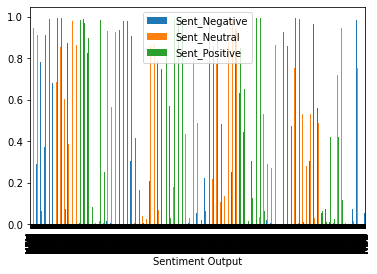

In [36]:
df.plot(x="Sentiment Output", y=["Sent_Negative", "Sent_Neutral", "Sent_Positive"], kind="bar")